In [1]:
# Graphic tools
import matplotlib.pyplot as plt
import matplotlib

font_params = {'size' : 14}
matplotlib.rc('font', **font_params)

# Source Seeking Tools
import SS_tools.toolbox as sstb
from SS_tools.scalar_field import *

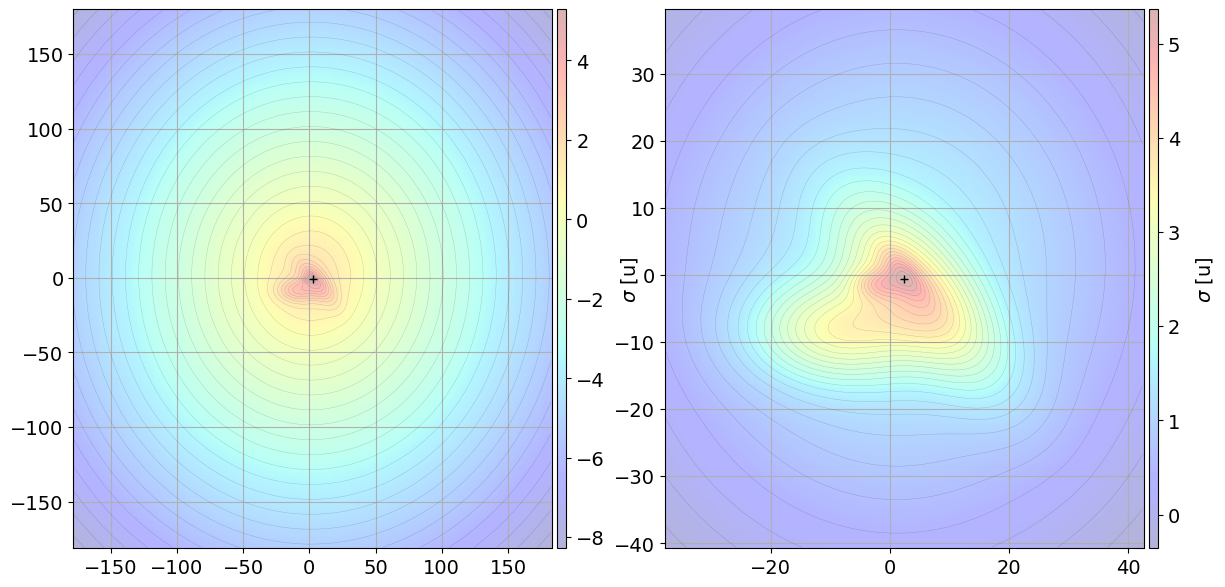

In [25]:
# ----------------------------------------------------------------------
# Testing sigma_fract
# ----------------------------------------------------------------------

psi = 45 * np.pi / 180

# Generate the scalar field
R2 = sstb.M_rot(psi)

sigma_func = sigma_fract(k=0.04, dev=[7,2], mu=[0,0])
sigma_test = sigma(sigma_func)
sigma_test.rot = R2

# Generate the plot
fig = plt.figure(figsize=(7*2, 7), dpi=100)
(ax1, ax2) = fig.subplots(1,2)

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax1, xlim=180, ylim=180, contour_levels=40)

x = np.linspace(-25,150,10)
y = np.linspace(-50,125,10)

sigma_test.draw(fig=fig, ax=ax2, xlim=40, ylim=40, contour_levels=30)

ax1.grid(True)
ax2.grid(True)
plt.show()

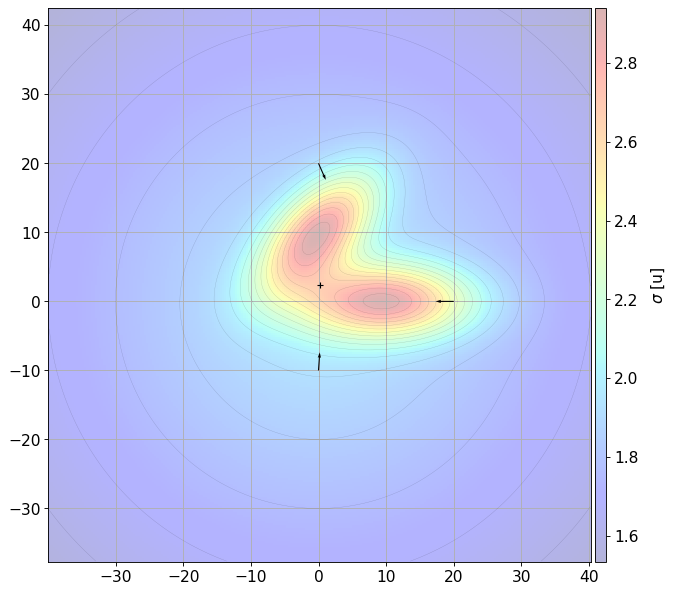

In [26]:
# ----------------------------------------------------------------------
# Testeamos un campo escalar que no nos sirve
# ----------------------------------------------------------------------

# Generate the scalar field
sigma_func = sigma_nonconvex(k=0.04, dev=5, a=[2,0], b=[0,2])
sigma_test = sigma(sigma_func, [0,0])

# Generate the plot
fig = plt.figure(figsize=(9, 9), dpi=80)
ax = fig.subplots()

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax, xlim=40, ylim=40, contour_levels=20)

# Draw multiple gradients
sigma_test.draw_grad([0, 20], ax, width=0.002, scale=30)
sigma_test.draw_grad([20, 0], ax, width=0.002, scale=30)
sigma_test.draw_grad([0,-10], ax, width=0.002, scale=30)

ax.grid(True)
plt.show()

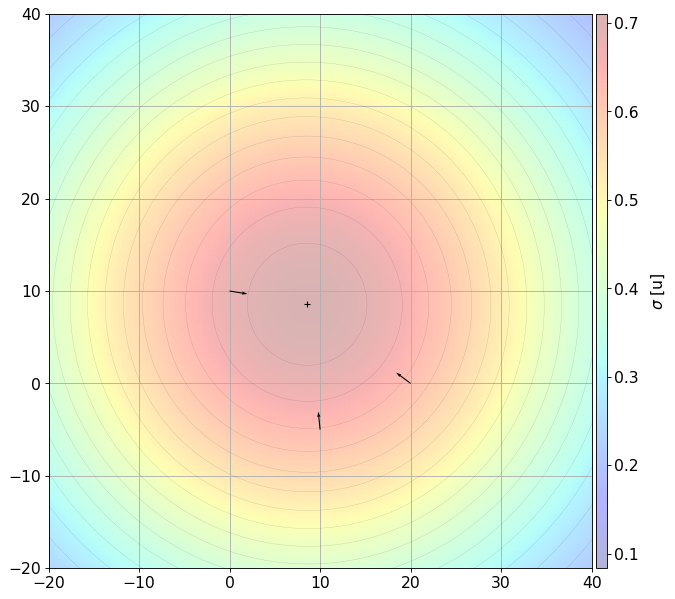

In [227]:
# ----------------------------------------------------------------------
# Testeamos gaussiana
# ----------------------------------------------------------------------

max_int = 100
mu = np.array([10,10]) + 6 * (np.random.rand() - 0.5)
dev = 30 * (np.random.rand() + 1)

psi = np.pi * np.random.rand()
a, b = 1 + 3*(np.random.rand()+1), 1 + 3*(np.random.rand()+1)

# Generate the scalar field
S = -np.array([[a,0],[0,b]])
R =  M_rot(psi)
R2 = M_rot(psi)

sigma_func = sigma_gauss(mu=mu, max_intensity=max_int, dev=dev, S=S, R=R)
sigma_test = sigma(sigma_func)
sigma_test.rot = R2

# Generate the plot
fig = plt.figure(figsize=(9, 9), dpi=80)
ax = fig.subplots()

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax, xlim=40, ylim=40, n=300, contour_levels=20)
ax.set_xlim([-20,40])
ax.set_ylim([-20,40])

# Draw multiple gradients
sigma_test.draw_grad([0,10], ax, width=0.002, scale=30)
sigma_test.draw_grad([20,0], ax, width=0.002, scale=30)
sigma_test.draw_grad([10,-5], ax, width=0.002, scale=30)

ax.grid(True)
plt.show()